In [2]:
%cd /content/drive/MyDrive/CSE_256_Project

/content/drive/MyDrive/CSE_256_Project


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [4]:
df_train = pd.read_csv("./aig_dataset/train.csv")
df_test = pd.read_csv("./aig_dataset/test.csv")

In [5]:
df_train.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [6]:
df_test.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class Index  7600 non-null   int64 
 1   Title        7600 non-null   object
 2   Description  7600 non-null   object
dtypes: int64(1), object(2)
memory usage: 178.2+ KB


In [9]:
df_train['text'] = df_train['Title'] + df_train['Description']
df_test['text'] = df_test['Title'] + df_test['Description']

In [10]:
df_train.head()

,Class Index,Title,Description,text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."


In [11]:
df_test.head()

,Class Index,Title,Description,text
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...,Fears for T N pension after talksUnions repres...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...",The Race is On: Second Private Team Sets Launc...
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...,Ky. Company Wins Grant to Study Peptides (AP)A...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...,Prediction Unit Helps Forecast Wildfires (AP)A...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...,Calif. Aims to Limit Farm-Related Smog (AP)AP ...


In [12]:
# Apply TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train_transform = vectorizer.fit_transform(df_train['text'])
X_test_transform = vectorizer.transform(df_test['text'])

In [13]:
import time

# Start the timer
start_time = time.time()

In [14]:
# build a Naive Bayes model
model = MultinomialNB()

In [15]:
execution_time = time.time() - start_time
execution_time

0.015956878662109375

In [16]:
# Train the model
model.fit(X_train_transform, df_train['Class Index'])

MultinomialNB()

In [17]:
y_pred = model.predict(X_test_transform)

In [18]:
accuracy = accuracy_score(df_test['Class Index'], y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9021052631578947


In [19]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(df_test['Class Index'], y_pred)
confusion_mat

array([[1698,   62,   94,   46],
       [  25, 1857,    7,   11],
       [  67,   19, 1630,  184],
       [  67,   20,  142, 1671]])

Text(0.5, 1.0, 'Confusion Matrix')

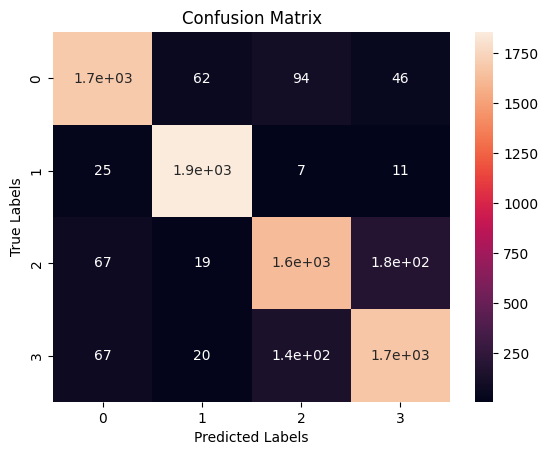

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_mat, annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')

In [21]:
# Calculate class-wise accuracy
import numpy as np
class_accuracy = np.diagonal(confusion_mat) / np.sum(confusion_mat, axis=1)
print("class-wise accuracy")
class_accuracy

class-wise accuracy


array([0.89368421, 0.97736842, 0.85789474, 0.87947368])

In [22]:
# Identify misclassified instances
num_classes = len(confusion_mat)

misclassified_instances = []

for i in range(num_classes):
    for j in range(num_classes):
        if i != j and confusion_mat[i, j] > 0:
            misclassified_instances.append((i, j, confusion_mat[i, j]))
misclassified_instances

[(0, 1, 62),
 (0, 2, 94),
 (0, 3, 46),
 (1, 0, 25),
 (1, 2, 7),
 (1, 3, 11),
 (2, 0, 67),
 (2, 1, 19),
 (2, 3, 184),
 (3, 0, 67),
 (3, 1, 20),
 (3, 2, 142)]

In [23]:
# printing misclassified data
wrong_predictions = 0
for idx, _ in enumerate(y_pred):
  if df_test.iloc[idx]['Class Index'] != y_pred[idx]:
    print(df_test.iloc[idx]['text'] + "\n\n")
    wrong_predictions += 1

Prediction Unit Helps Forecast Wildfires (AP)AP - It's barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. Lightning will strike in places he expects. Winds will pick up, moist places will dry and flames will roar.


Storage, servers bruise HP earningsupdate Earnings per share rise compared with a year ago, but company misses analysts' expectations by a long shot.


Some People Not Eligible to Get in on Google IPOGoogle has billed its IPO as a way for everyday people to get in on the process, denying Wall Street the usual stranglehold it's had on IPOs. Public bidding, a minimum of just five shares, an open process with 28 underwriters - all this pointed to a new level of public participation. But this isn't the case.


Rivals Try to Turn Tables on Charles SchwabBy MICHAEL LIEDTKE     SAN FRANCISCO (AP) -- With its low prices and iconoclastic attitude, discount stock broker Charles Sch

In [24]:
# printing wrong predictions
wrong_predictions

744

In [25]:
# common misclassification
common_misclassifications = sorted(misclassified_instances, key=lambda x: x[2], reverse=True)
common_misclassifications

[(2, 3, 184),
 (3, 2, 142),
 (0, 2, 94),
 (2, 0, 67),
 (3, 0, 67),
 (0, 1, 62),
 (0, 3, 46),
 (1, 0, 25),
 (3, 1, 20),
 (2, 1, 19),
 (1, 3, 11),
 (1, 2, 7)]

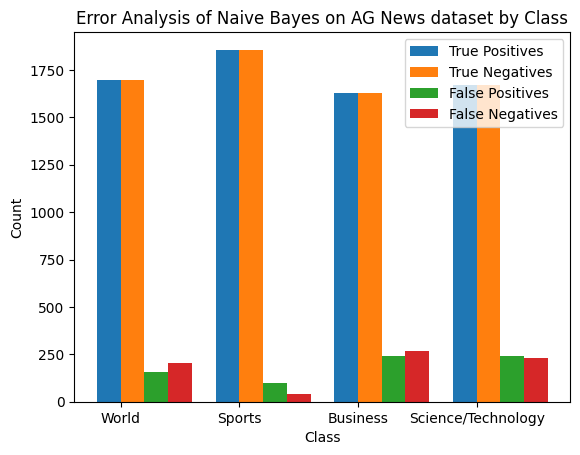

In [26]:
true_positives = np.diag(confusion_mat)
true_negatives = np.sum(confusion_mat) - np.sum(confusion_mat, axis=(0, 1)) + true_positives
false_positives = np.sum(confusion_mat, axis=0) - true_positives
false_negatives = np.sum(confusion_mat, axis=1) - true_positives

# Set the labels for x-axis
labels = ['World', 'Sports', 'Business', 'Science/Technology']

# Create the bar plot
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, true_positives, width, label='True Positives')
rects2 = ax.bar(x + width/2, true_negatives, width, label='True Negatives')
rects3 = ax.bar(x + width*1.5, false_positives, width, label='False Positives')
rects4 = ax.bar(x + width*2.5, false_negatives, width, label='False Negatives')

# Set plot title, legend, and axis labels
ax.set_title('Error Analysis of Naive Bayes on AG News dataset by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()